<a href="https://colab.research.google.com/github/sandracumic/CE880_Case_Study/blob/main/2205497_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calling Librairies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# Reading Data

In [ ]:
data = pd.read_excel('https://github.com/sandracumic/data-test-/blob/main/Data_shipping-3.xlsx?raw=true')

In [ ]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,ROT_Y
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
data.shape

(10999, 12)

# Data analysis

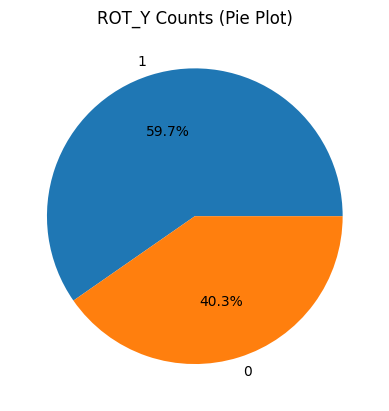

In [ ]:
# Print the class distribution
counts = data['ROT_Y'].value_counts()

# Pie plot
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title('ROT_Y Counts (Pie Plot)')
plt.show()


Even though the class count is not equallt devided between the classes, we can proceed without sampling

## Checking the correlation 

<ipython-input-6-c5800093f7a0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


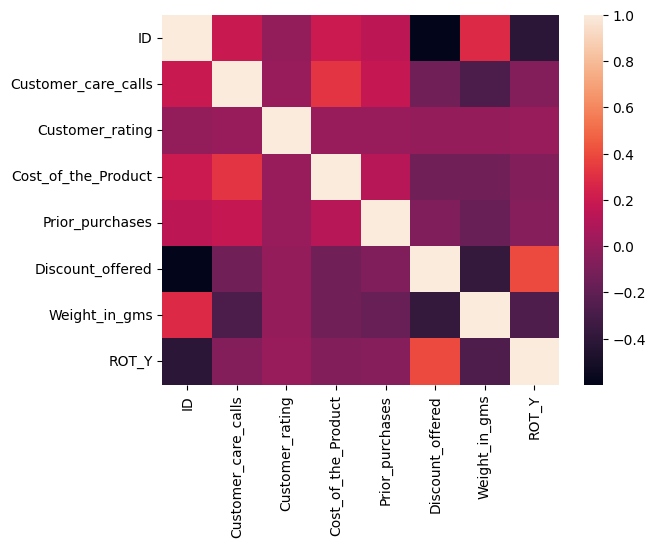

In [ ]:
sns.heatmap(data.corr())
plt.show()

The correlation heatmap plot showed that the correlation betweem the numerical attributes is minimum. No need to perform vecorisation

## Checking duplicates in data

In [ ]:
any(data.duplicated())

False

No duplicate observation --> We are using all the data presented in the file

## Checking missing data

In [ ]:
print(data.isnull().sum())

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
ROT_Y                  0
dtype: int64


Data is clean. No need for imputations

## Checking outliers

# Data preprocessing

## Dropping non useful columns

In [ ]:
processed_data = data.drop(columns=['ID'])

In [ ]:
processed_data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,ROT_Y
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


## Converting non integer features

We need to deal with **Warehouse_block**, **Mode_of_Shipment**, **Gender** and **Product_importance**. 	
We need to check the values inside of these columns to decide the best solution.

In [ ]:
pd.unique(processed_data.Warehouse_block)

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [ ]:
pd.unique(processed_data.Mode_of_Shipment)

array(['Flight', 'Ship', 'Road'], dtype=object)

This column is not ordered and present multiple levels. Using dummy variables looks like the best solution.

In [ ]:
processed_data = pd.get_dummies(processed_data, columns= ['Mode_of_Shipment','Warehouse_block'])

In [ ]:
pd.unique(processed_data.Product_importance)

array(['low', 'medium', 'high'], dtype=object)

We can use an ordered numerical attribute to deal with this feature.

In [ ]:
pd.unique(processed_data.Gender)

array(['F', 'M'], dtype=object)

It looks like a binary feature. Best solution is to convert into 0, 1 numerical column.

In [ ]:
cleanup = {'Product_importance': {'low':1, 'medium':2, 'high':3},
           'Gender': {'F':0,'M':1}}
processed_data.replace(cleanup, inplace=True)

In [ ]:
processed_data.Product_importance

0        1
1        1
2        1
3        2
4        2
        ..
10994    2
10995    2
10996    1
10997    2
10998    1
Name: Product_importance, Length: 10999, dtype: int64

In [ ]:
processed_data.Gender

0        0
1        1
2        1
3        1
4        0
        ..
10994    0
10995    0
10996    0
10997    1
10998    0
Name: Gender, Length: 10999, dtype: int64

## Results of the transformation

In [ ]:
processed_data.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,ROT_Y,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
0,4,2,177,3,1,0,44,1233,1,1,0,0,0,0,0,1,0
1,4,5,216,2,1,1,59,3088,1,1,0,0,0,0,0,0,1
2,2,2,183,4,1,1,48,3374,1,1,0,0,1,0,0,0,0
3,3,3,176,4,2,1,10,1177,1,1,0,0,0,1,0,0,0
4,2,2,184,3,2,0,46,2484,1,1,0,0,0,0,1,0,0


In [ ]:
processed_data.dtypes

Customer_care_calls        int64
Customer_rating            int64
Cost_of_the_Product        int64
Prior_purchases            int64
Product_importance         int64
Gender                     int64
Discount_offered           int64
Weight_in_gms              int64
ROT_Y                      int64
Mode_of_Shipment_Flight    uint8
Mode_of_Shipment_Road      uint8
Mode_of_Shipment_Ship      uint8
Warehouse_block_A          uint8
Warehouse_block_B          uint8
Warehouse_block_C          uint8
Warehouse_block_D          uint8
Warehouse_block_F          uint8
dtype: object

## Checking outliers

## we check for the outliners because if any would be present, it would be making the machine learning outcome not trustworthy. 

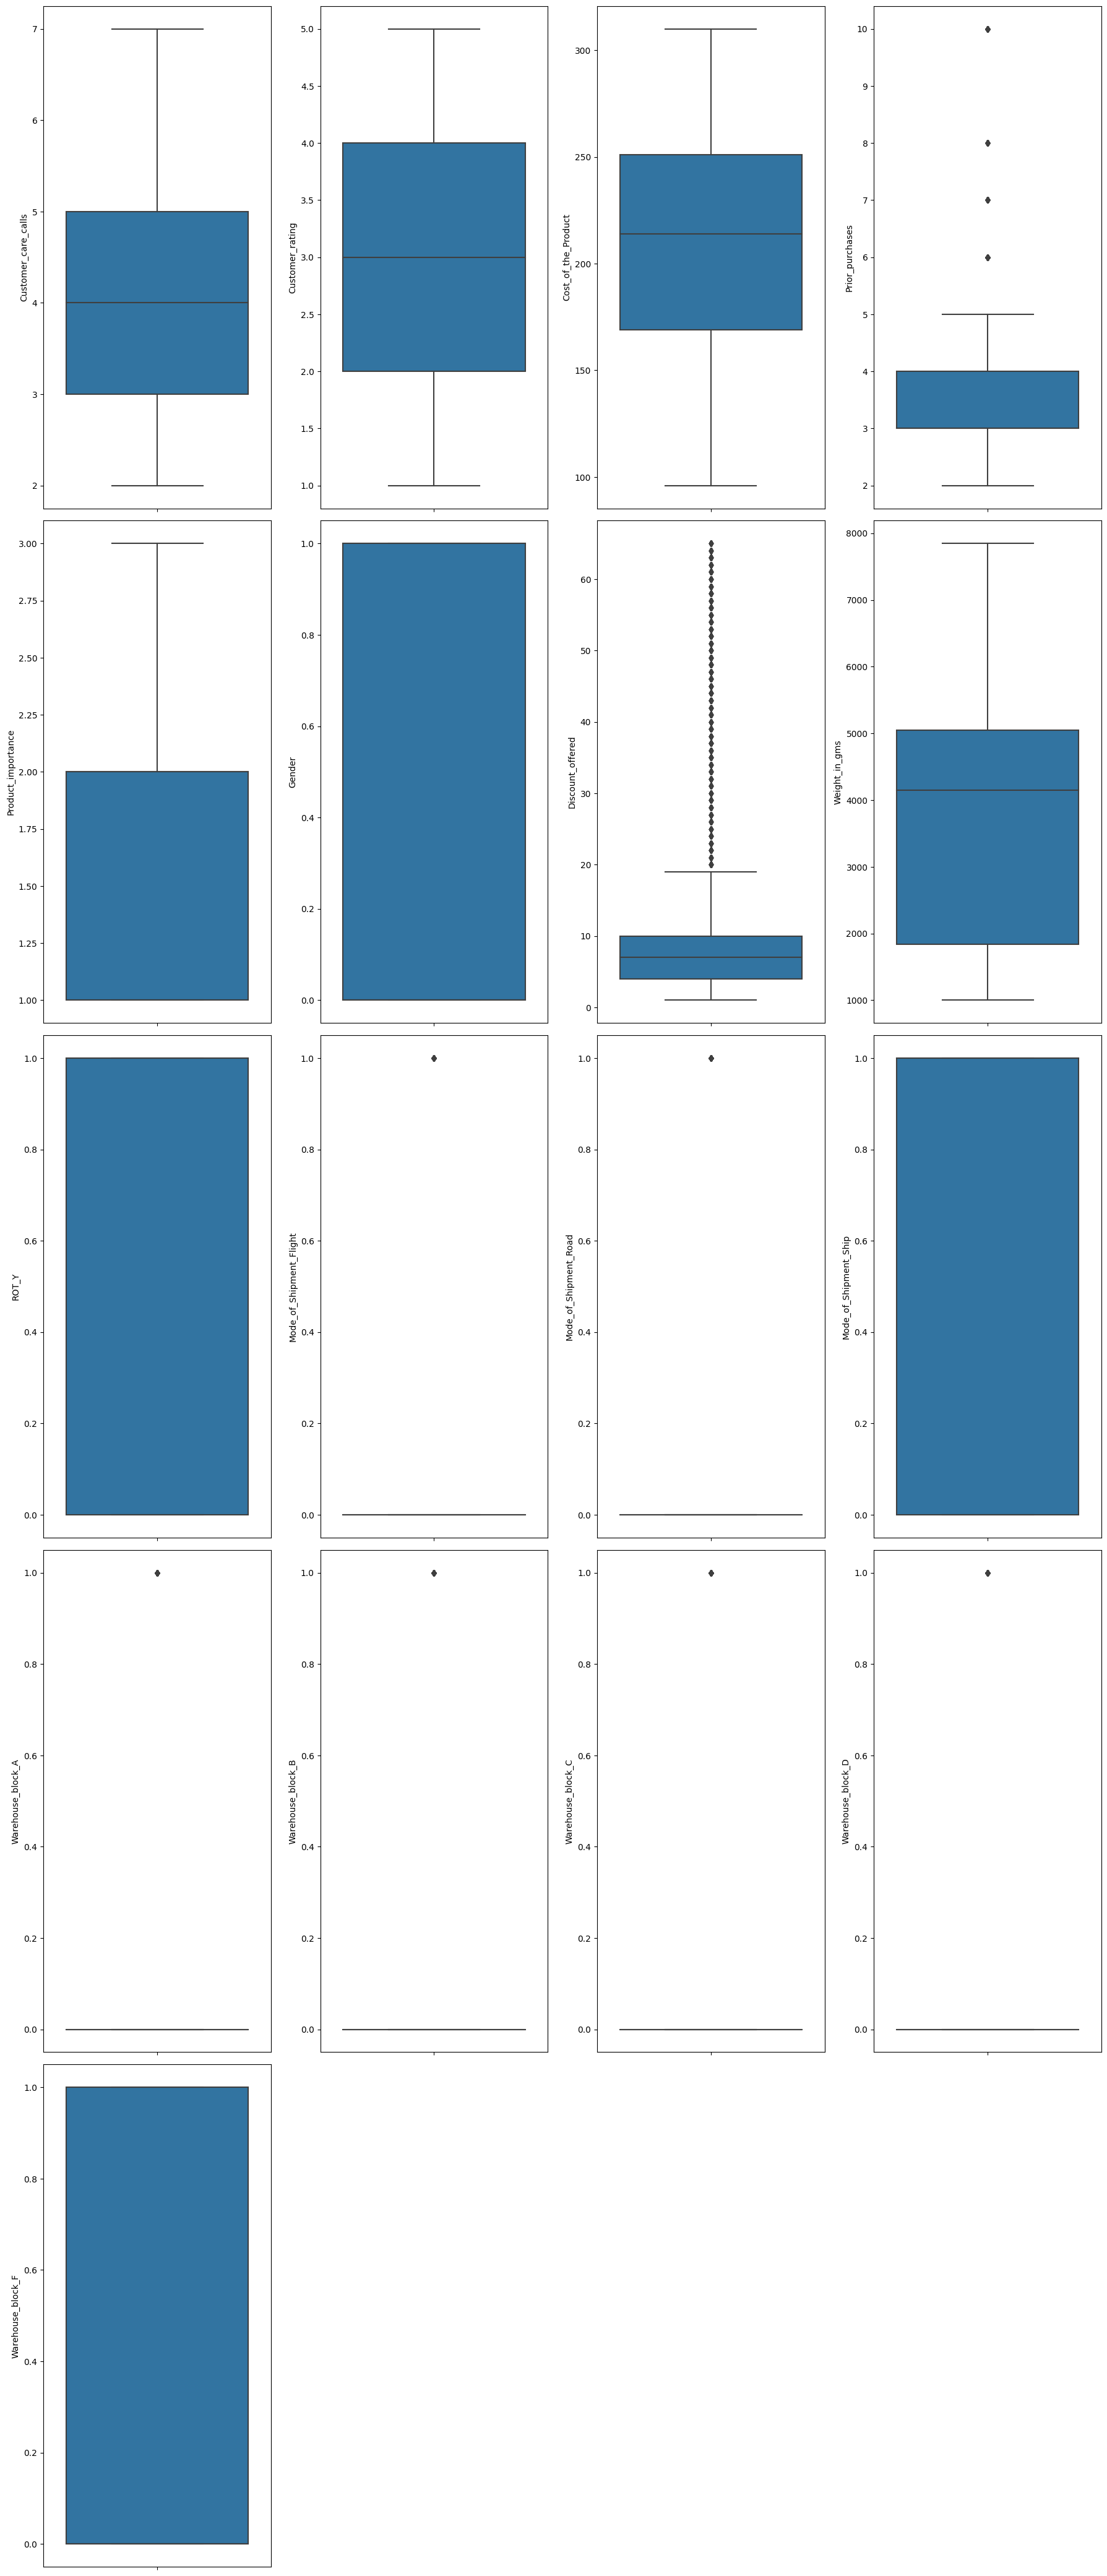

In [ ]:
plt.figure(figsize =(18,50))


for i,col in enumerate(processed_data.loc[:, processed_data.columns != 'Class'].columns.tolist()):
    plt.subplot(6,4,i+1)
    sns.boxplot(y=col, data= processed_data)
    
plt.tight_layout()
plt.show()

Data looks fine. No outliers to be detected

# Classification

We need to prepare the data for the training using cross validation. 
The objective is also to store the metrics of multiple classifiers in order to make the comparaison in the end.

In [ ]:
c = [c for c in processed_data.columns if c != 'ROT_Y']
X = processed_data.loc[:, c].values
Y = processed_data['ROT_Y'].values

In [ ]:
Comparativedf = pd.DataFrame(columns =['Classifier', 'Mean_f1', 'Mean_accuracy', 'Best_param'])
Comparativedf

,Classifier,Mean_f1,Mean_accuracy,Best_param


Creating a dectionary to store the results

In [ ]:
Com_accuracy_fold = {}
Com_fscore_fold = {}

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, KFold, GridSearchCV

cv = KFold(shuffle=True)
dt = DecisionTreeClassifier()
param_grid = { 
    'criterion' : ["gini", "entropy"],
    'max_depth': list(range(1, 21))          
}
search = GridSearchCV(dt, param_grid, n_jobs=-1)
scores = cross_validate(search, X, Y, scoring=['f1','accuracy'], cv=cv, return_estimator=True)

In [ ]:
print('Fold f1', scores['test_f1'])
print('Average f1', np.mean(scores['test_f1']))
print('Fold accuracy', scores['test_accuracy'])
print('Average accuracy', np.mean(scores['test_accuracy']))

Fold f1 [0.70573566 0.69093918 0.69801788 0.67438867 0.69218372]
Average f1 0.692253023361372
Fold accuracy [0.67818182 0.66045455 0.64681818 0.655      0.65256935]
Average accuracy 0.6586047790317913


In [ ]:
search.fit(X,Y)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20]})

In [ ]:
Com_accuracy_fold ['DT'] =  scores['test_accuracy']
Com_fscore_fold ['DT'] =  scores['test_f1']

In [ ]:
search.best_params_
Comparativedf
Comparativedf = Comparativedf.append({'Classifier' : 'DT','Mean_f1': np.mean(scores['test_f1']), 'Mean_accuracy': np.mean(scores['test_accuracy']), 'Best_param':search.best_params_ }, ignore_index = True)

<ipython-input-29-2907cf766736>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Comparativedf = Comparativedf.append({'Classifier' : 'DT','Mean_f1': np.mean(scores['test_f1']), 'Mean_accuracy': np.mean(scores['test_accuracy']), 'Best_param':search.best_params_ }, ignore_index = True)


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
cv = KFold(shuffle=True)
knn = KNeighborsClassifier()
param_grid = { 
    'n_neighbors': list(range(1, 5))          
}
search = GridSearchCV(knn, param_grid, n_jobs=-1)
scores = cross_validate(search, X, Y, scoring=['f1','accuracy'], cv=cv, return_estimator=True)

In [ ]:
print('Fold f1', scores['test_f1'])
print('Average f1', np.mean(scores['test_f1']))
print('Fold accuracy', scores['test_accuracy'])
print('Average accuracy', np.mean(scores['test_accuracy']))

Fold f1 [0.66421681 0.65039929 0.66275395 0.68173759 0.66577778]
Average f1 0.6649770838092968
Fold accuracy [0.66772727 0.64181818 0.66045455 0.67363636 0.65802638]
Average accuracy 0.6603325478523295


In [ ]:
search.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4]})

In [ ]:
search.best_params_

{'n_neighbors': 2}

In [ ]:
Comparativedf = Comparativedf.append({'Classifier' : 'KNN','Mean_f1': np.mean(scores['test_f1']), 'Mean_accuracy': np.mean(scores['test_accuracy']), 'Best_param':search.best_params_ }, ignore_index = True)

<ipython-input-34-42f80b7abff2>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Comparativedf = Comparativedf.append({'Classifier' : 'KNN','Mean_f1': np.mean(scores['test_f1']), 'Mean_accuracy': np.mean(scores['test_accuracy']), 'Best_param':search.best_params_ }, ignore_index = True)


In [ ]:
Com_accuracy_fold ['KNN'] =  scores['test_accuracy']
Com_fscore_fold ['KNN'] =  scores['test_f1']

## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
cv = KFold(shuffle=True)
sc = StandardScaler()
svc = SVC()
pipe = Pipeline(steps=[('scaler', sc), ('classifier', svc)])
param_grid = { 
    'classifier__C': [ 10, 100], 
     'classifier__gamma': [0.01,0.001],
     'classifier__kernel': ['rbf']
}
search = GridSearchCV(pipe, param_grid,refit=True, n_jobs=-1)
scores = cross_validate(search, X, Y, scoring=['f1','accuracy'], cv=cv, return_estimator=True)

In [ ]:
print('Fold f1', scores['test_f1'])
print('Average f1', np.mean(scores['test_f1']))
print('Fold accuracy', scores['test_accuracy'])
print('Average accuracy', np.mean(scores['test_accuracy']))

Fold f1 [0.65263158 0.66666667 0.67324185 0.66491918 0.66493731]
Average f1 0.664479317526705
Fold accuracy [0.64       0.65681818 0.65363636 0.65136364 0.64756708]
Average accuracy 0.6498770515523585


In [ ]:
search.fit(X,Y)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [10, 100],
                         'classifier__gamma': [0.01, 0.001],
                         'classifier__kernel': ['rbf']})

In [ ]:
search.best_params_

{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}

In [ ]:
Comparativedf = Comparativedf.append({'Classifier' : 'SVC','Mean_f1': np.mean(scores['test_f1']), 'Mean_accuracy': np.mean(scores['test_accuracy']), 'Best_param':search.best_params_ }, ignore_index = True)

<ipython-input-40-97f299d61885>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Comparativedf = Comparativedf.append({'Classifier' : 'SVC','Mean_f1': np.mean(scores['test_f1']), 'Mean_accuracy': np.mean(scores['test_accuracy']), 'Best_param':search.best_params_ }, ignore_index = True)


In [ ]:
Com_accuracy_fold ['SVC'] =  scores['test_accuracy']
Com_fscore_fold ['SVC'] =  scores['test_f1']

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(verbose = True) # verbose =1 to see the progress of the classifier
pipe = Pipeline(steps=[('scaler', sc), ('classifier', RFC)]) 
param_grid = {

    "classifier__n_estimators":[85, 95 ],  
    "classifier__max_depth":[ 4,5 ], 
    "classifier__max_features":[12 ,14, 16 ],       
    'classifier__min_samples_leaf': [2, 3, 4 ]  
   
    }
    
search = GridSearchCV(pipe, param_grid, n_jobs=-1, verbose =1) # verbose =1 to see the progress of the classifier
scores = cross_validate(search, X, Y, scoring=['f1','accuracy'], cv=cv , verbose =1) # verbose =1 to see the progress of the classifier


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    0.0s finished


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    0.0s finished


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    0.0s finished


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    0.0s finished


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  9.5min finished


In [ ]:
print('Fold f1', scores['test_f1'])
print('Average f1', np.mean(scores['test_f1']))
print('Fold accuracy', scores['test_accuracy'])
print('Average accuracy', np.mean(scores['test_accuracy']))

Fold f1 [0.66028226 0.66793169 0.65177665 0.65764411 0.64700285]
Average f1 0.656927512263062
Fold accuracy [0.69363636 0.68181818 0.68818182 0.68954545 0.6625739 ]
Average accuracy 0.683151143081566


In [ ]:
search.fit(X,Y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    1.0s finished


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(verbose=True))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [4, 5],
                         'classifier__max_features': [12, 14, 16],
                         'classifier__min_samples_leaf': [2, 3, 4],
                         'classifier__n_estimators': [85, 95]},
             verbose=1)

In [ ]:
search.best_params_

{'classifier__max_depth': 5,
 'classifier__max_features': 14,
 'classifier__min_samples_leaf': 2,
 'classifier__n_estimators': 85}

In [ ]:
Comparativedf = Comparativedf.append({'Classifier' : 'RFC','Mean_f1': np.mean(scores['test_f1']), 'Mean_accuracy': np.mean(scores['test_accuracy']), 'Best_param':search.best_params_ }, ignore_index = True)

<ipython-input-54-6cf918117e8d>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Comparativedf = Comparativedf.append({'Classifier' : 'RFC','Mean_f1': np.mean(scores['test_f1']), 'Mean_accuracy': np.mean(scores['test_accuracy']), 'Best_param':search.best_params_ }, ignore_index = True)


In [ ]:
Com_accuracy_fold ['RFC'] =  scores['test_accuracy']
Com_fscore_fold ['RFC'] =  scores['test_f1']

# Checking the results

In [ ]:
Comparativedf

,Classifier,Mean_f1,Mean_accuracy,Best_param
0,DT,0.692253,0.658605,"{'criterion': 'gini', 'max_depth': 19}"
1,KNN,0.664977,0.660333,{'n_neighbors': 2}
2,SVC,0.664479,0.649877,"{'classifier__C': 100, 'classifier__gamma': 0...."
3,KNN,0.656928,0.683151,"{'classifier__max_depth': 5, 'classifier__max_..."
4,RFC,0.656928,0.683151,"{'classifier__max_depth': 5, 'classifier__max_..."


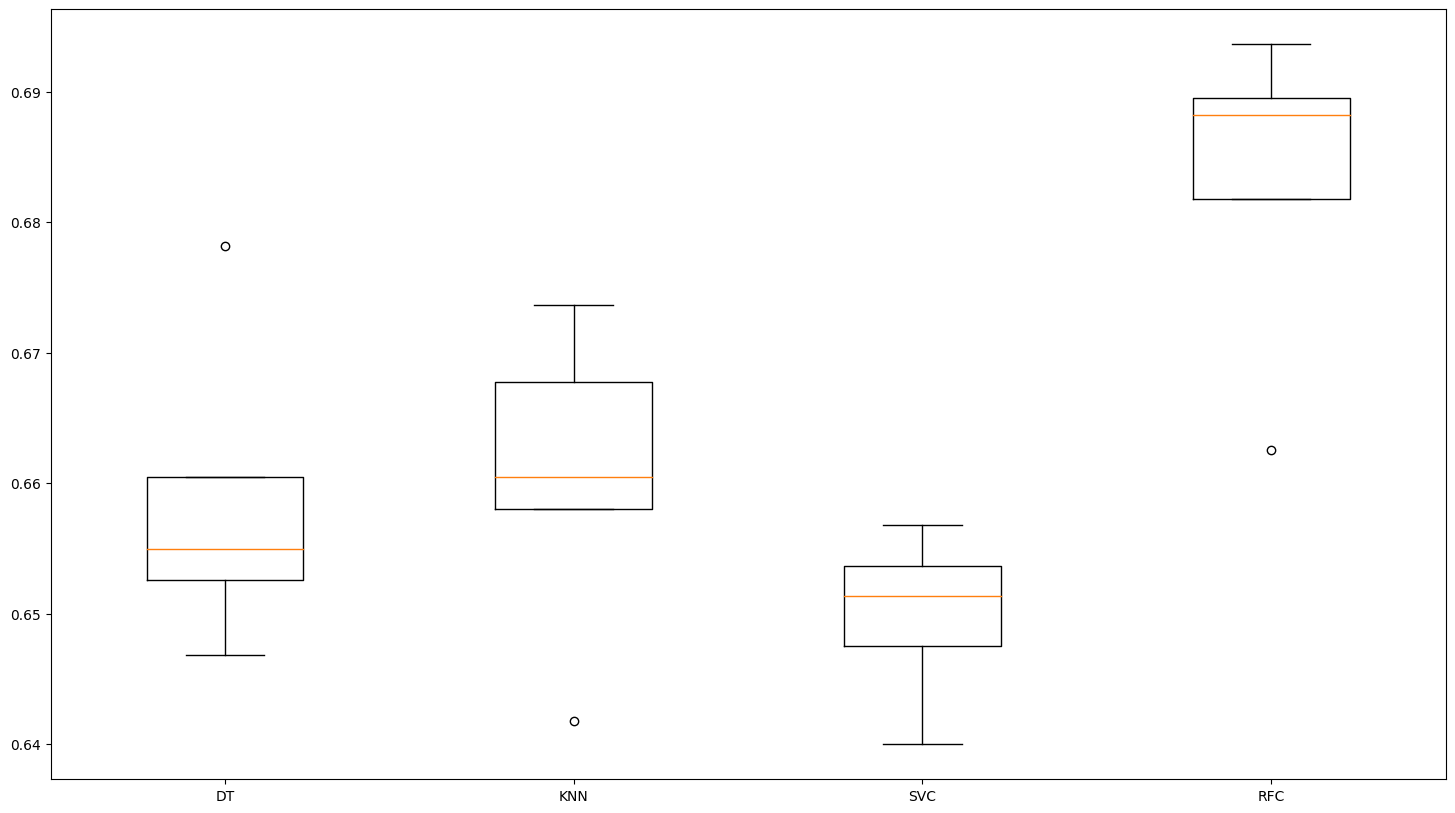

In [ ]:
labels, data = [*zip(*Com_accuracy_fold.items())]
plt.rcParams['figure.figsize']=[18,10]
plt.boxplot(data)
plt.xticks(range(1, len(labels)+1),  labels)
plt.show()

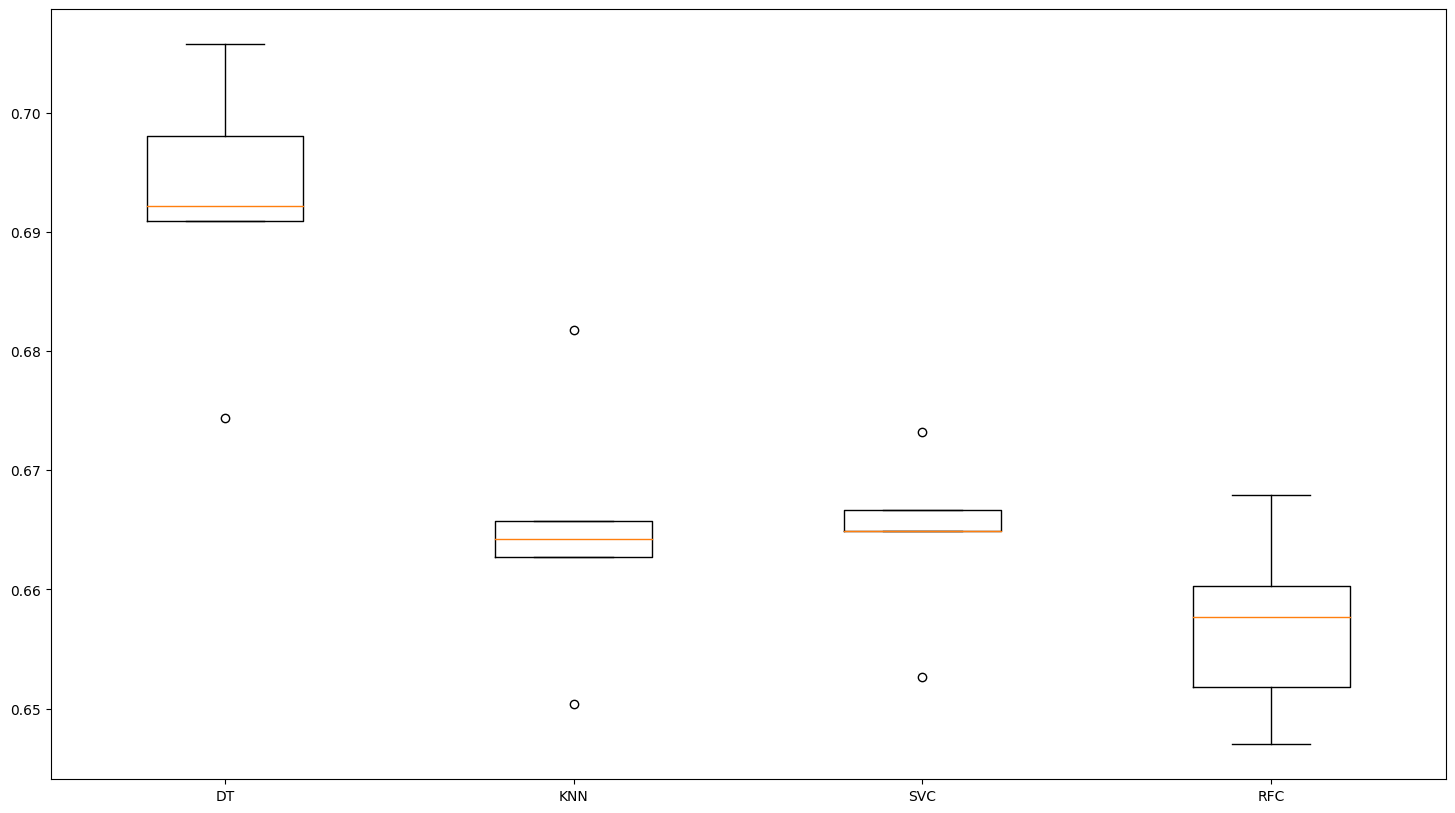

In [ ]:
labels, data = [*zip(*Com_fscore_fold.items())]
plt.rcParams['figure.figsize']=[18,10]
plt.boxplot(data)
plt.xticks(range(1, len(labels)+1),  labels)
plt.show()

(0.5, 1.0)

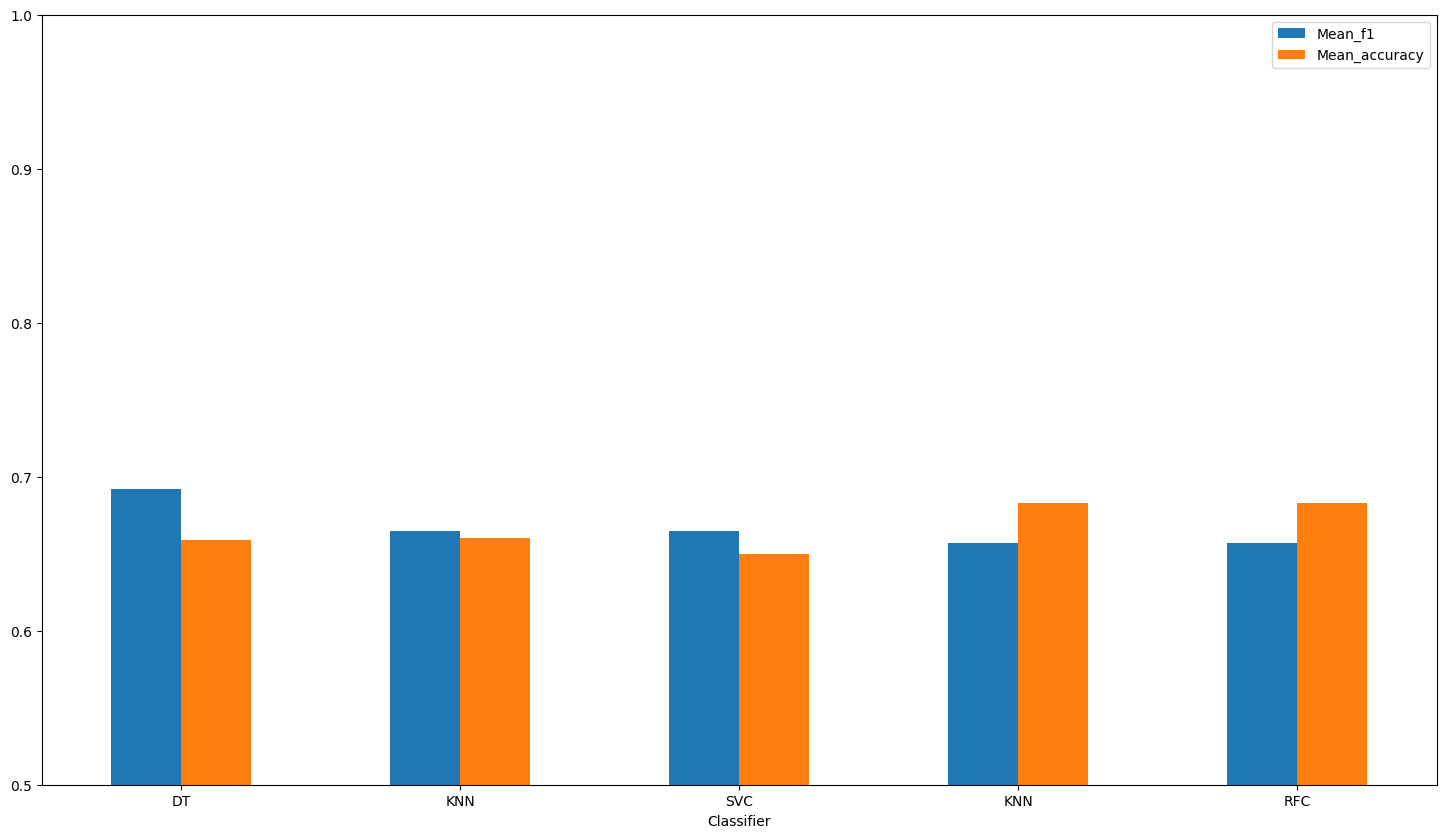

In [ ]:
plotdf = pd.DataFrame({'Mean_f1': Comparativedf.Mean_f1.values,
                   'Mean_accuracy': Comparativedf.Mean_accuracy.values}, index=Comparativedf.Classifier )
ax = plotdf.plot.bar(rot=0)
ax.set_ylim(0.5, 1)

(0.5, 1.0)

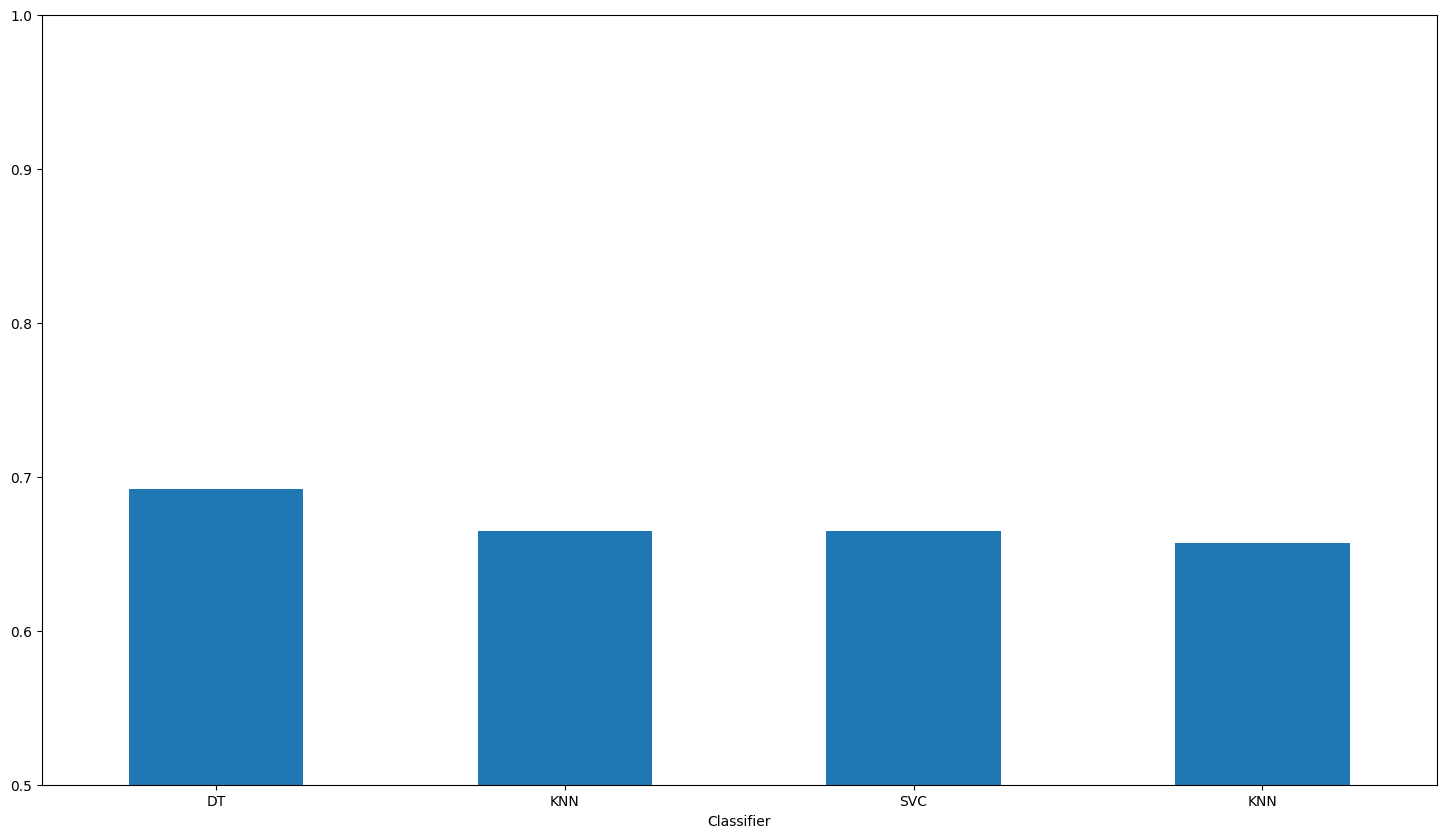

In [ ]:
ax = plotdf.sort_values('Mean_f1', ascending=False).Mean_f1.plot.bar(rot=0)
ax.set_ylim(0.5, 1)

(0.5, 1.0)

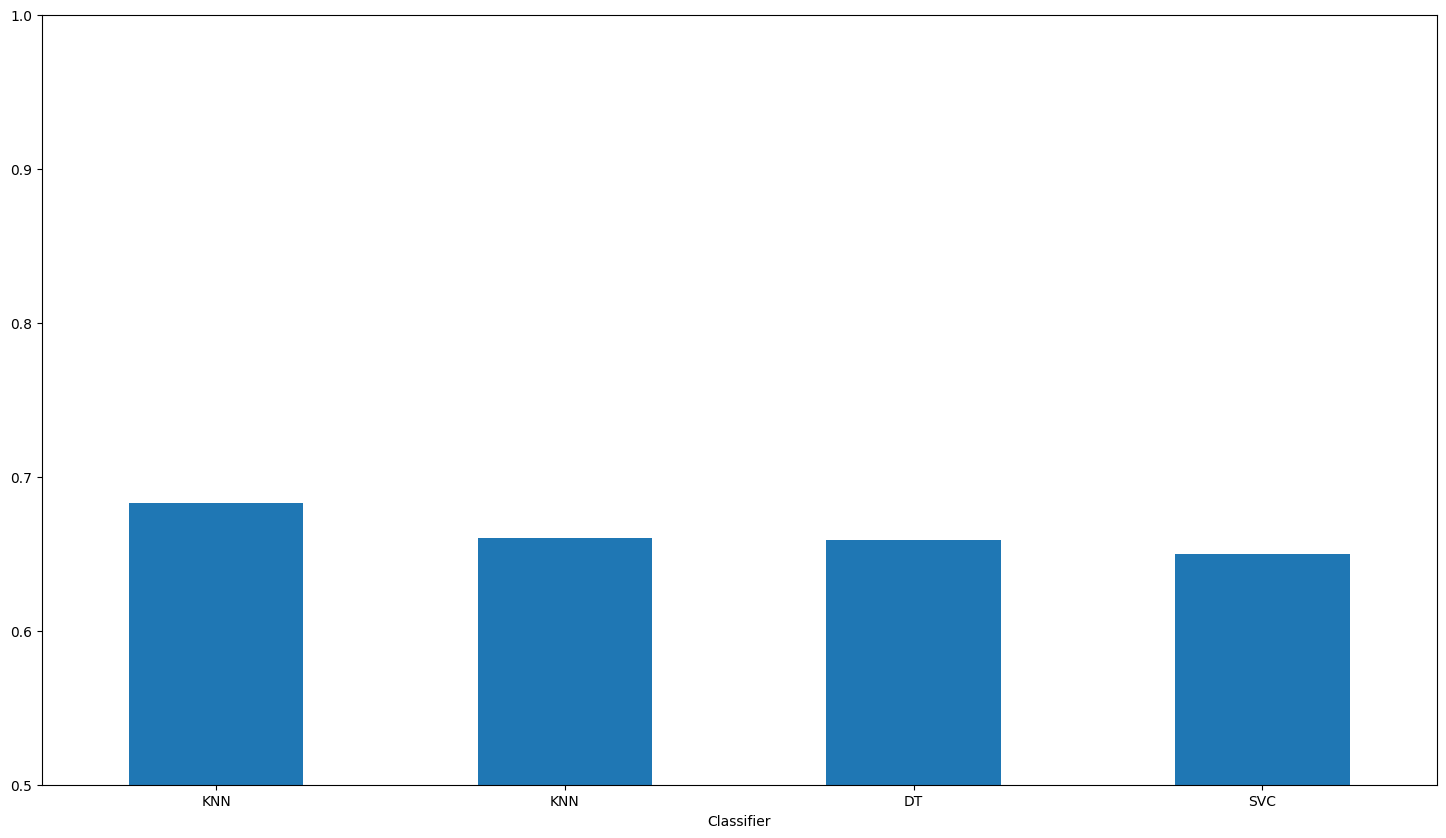

In [ ]:
ax = plotdf.sort_values('Mean_accuracy', ascending=False).Mean_accuracy.plot.bar(rot=0)
ax.set_ylim(0.5, 1)